# Get  metrics

In [1]:
import pandas as pd

In [10]:
data = pd.read_csv('data/predictions/pytorch_1st/global_metrics_k10.csv')
data['accuracy'] = (data['accuracy_top_k'] + data['accuracy_flop_k']) / 2
data['accuracy'].mean()

np.float64(0.5182393640512292)

<Axes: title={'center': 'Accuracy by Year'}, xlabel='Year', ylabel='Accuracy'>

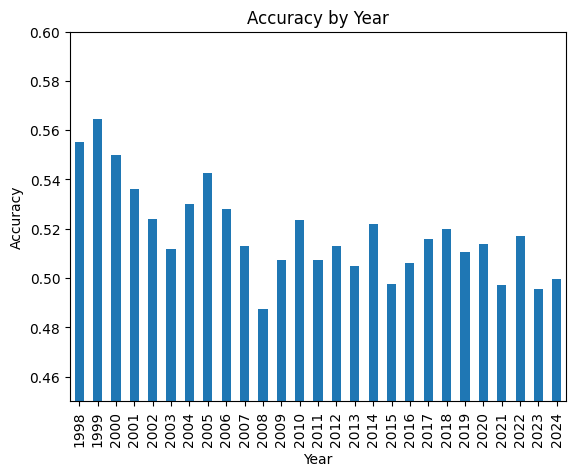

In [11]:
# display accuracy per year
accuracy_by_year = data.groupby('year')['accuracy'].mean()
accuracy_by_year.plot(kind='bar', title='Accuracy by Year', ylabel='Accuracy', xlabel='Year', ylim=(0.45, 0.6))

<Axes: title={'center': 'Average Daily Return by Year'}, xlabel='Year', ylabel='Return in %'>

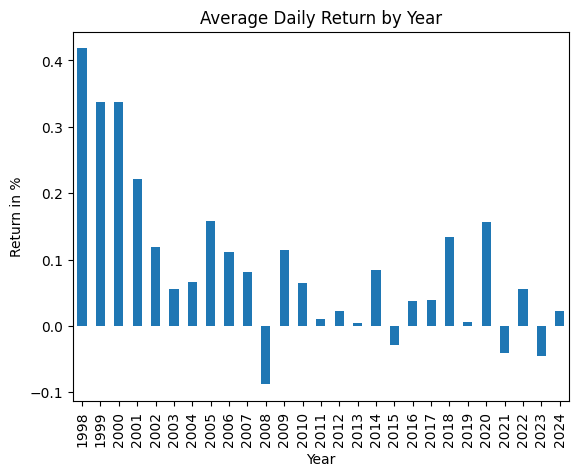

In [12]:
return_by_year = data.groupby('year')['overall_return'].mean()
return_by_year.plot(kind='bar', title='Average Daily Return by Year', ylabel='Return in %', xlabel='Year')

In [13]:
data['date'] = pd.to_datetime(data['date'])
data[['overall_return', 'avg_return_flop_k', 'avg_return_top_k']].mean()

overall_return       0.090835
avg_return_flop_k    0.053359
avg_return_top_k     0.037476
dtype: float64

## Cumulative profits

In [14]:
# calculate cumulative profits
data['cumulative_profits'] = (1 + data['overall_return']/100).cumprod() - 1

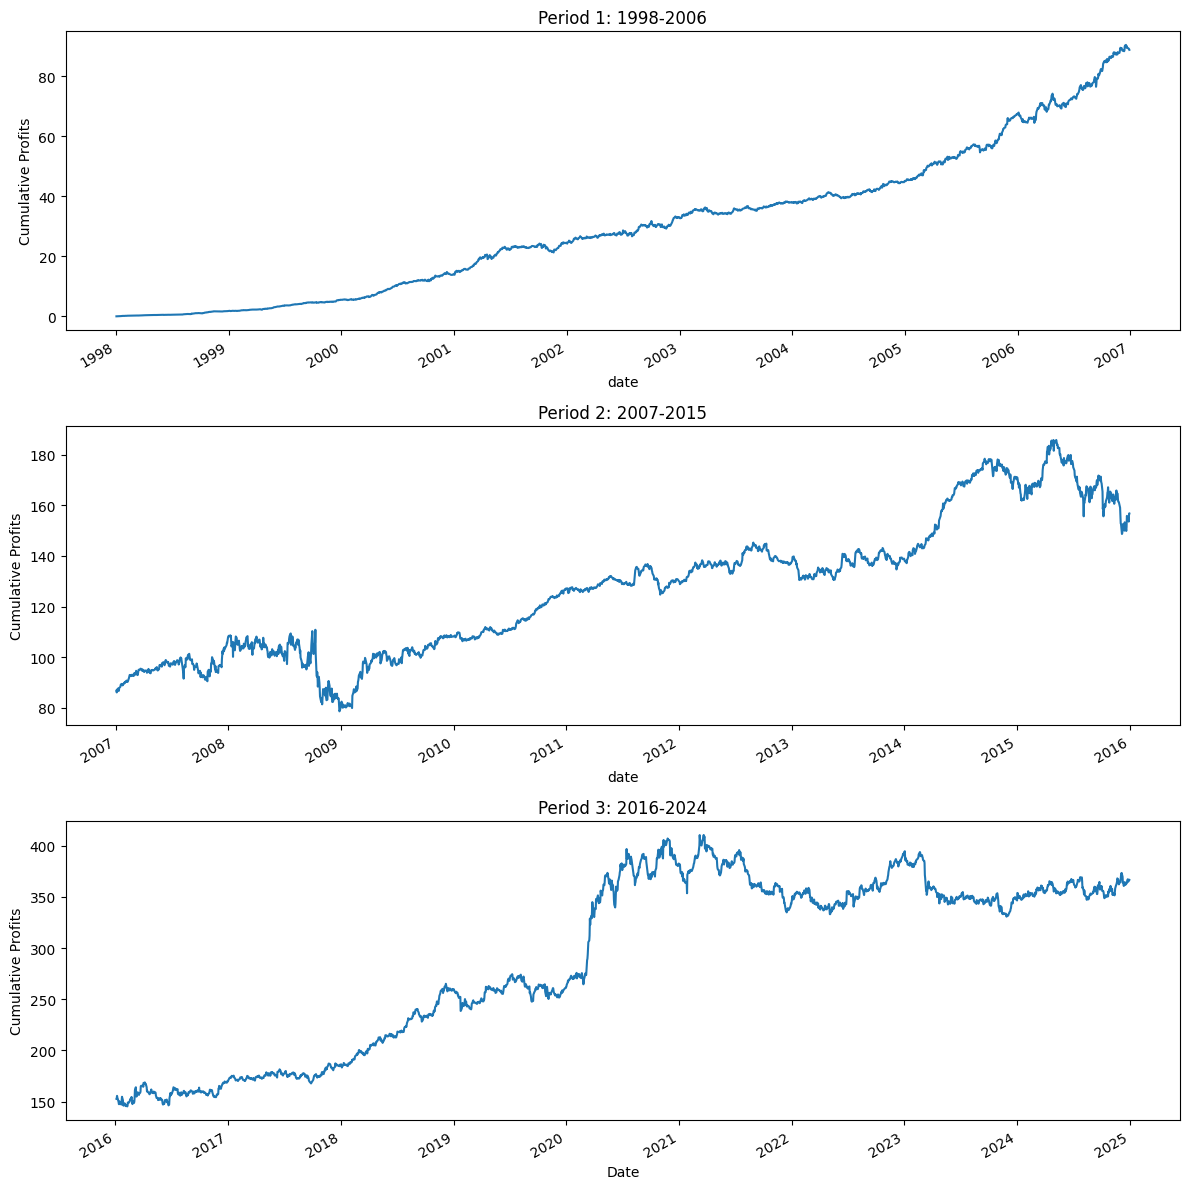

In [15]:
import matplotlib.pyplot as plt

# Get unique years and split into 3 periods
years = sorted(data['year'].unique())
period1 = years[:9]   # First 9 years
period2 = years[9:18] # Next 9 years
period3 = years[18:]  # Last 9 years

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Period 1
data_p1 = data[data['year'].isin(period1)]
data_p1.set_index('date')[['cumulative_profits']].plot(ax=axes[0], title=f'Period 1: {period1[0]}-{period1[-1]}', ylabel='Cumulative Profits', legend=False)

# Period 2
data_p2 = data[data['year'].isin(period2)]
data_p2.set_index('date')[['cumulative_profits']].plot(ax=axes[1], title=f'Period 2: {period2[0]}-{period2[-1]}', ylabel='Cumulative Profits', legend=False)

# Period 3
data_p3 = data[data['year'].isin(period3)]
data_p3.set_index('date')[['cumulative_profits']].plot(ax=axes[2], title=f'Period 3: {period3[0]}-{period3[-1]}', ylabel='Cumulative Profits', xlabel='Date', legend=False)

plt.tight_layout()
plt.show()

In [17]:
from pathlib import Path
import glob

# Get all CSV files from the output folder
output_folder = Path('data/predictions')
csv_files = sorted(glob.glob(str(output_folder / 'predictions_*.csv')))

prediction_results = []

for csv_file in csv_files:
    # Extract year from filename (e.g., predictions_2005.csv -> 2005)
    year = Path(csv_file).stem.split('_')[-1]
    
    # Read the CSV file
    results_df = pd.read_csv(csv_file)
    prediction_results.append(results_df)

all_predictions = pd.concat(prediction_results, ignore_index=True)
all_predictions

ValueError: No objects to concatenate